In [1]:
import os
from tqdm import notebook
import csv
import time

In [ ]:
tcga_data_sl

In [2]:
os.getcwd()

'/scratch/hs3470/genomics'

In [3]:
os.chdir('datasets/tcga/')

In [4]:
os.getcwd()

'/scratch/hs3470/genomics/datasets/tcga'

In [5]:
import pandas as pd

In [6]:
sample_map = pd.read_csv('TcgaTargetGTEX_phenotype.csv')

In [7]:
sample_map

,sample,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
0,TCGA-V4-A9EE-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
1,TCGA-VD-AA8N-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
2,TCGA-V4-A9EI-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
3,TCGA-VD-AA8O-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
4,TCGA-WC-A888-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
...,...,...,...,...,...,...,...
19126,TARGET-20-PANPKN-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET
19127,TARGET-20-PANLIR-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET
19128,TARGET-20-PAPAWN-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET
19129,TARGET-20-PANPTM-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET


In [8]:
probemap_tcga = pd.read_csv('probemap_tcga.csv')

In [9]:
probemap_tcga

,id,gene,chrom,chromStart,chromEnd,strand
0,ENSG00000223972.5,DDX11L1,chr1,11869,14409,+
1,ENSG00000227232.5,WASH7P,chr1,14404,29570,-
2,ENSG00000278267.1,MIR6859-1,chr1,17369,17436,-
3,ENSG00000243485.3,RP11-34P13.3,chr1,29554,31109,+
4,ENSG00000274890.1,MIR1302-2,chr1,30366,30503,+
...,...,...,...,...,...,...
60493,ENSG00000198695.2,MT-ND6,chrM,14149,14673,-
60494,ENSG00000210194.1,MT-TE,chrM,14674,14742,-
60495,ENSG00000198727.2,MT-CYB,chrM,14747,15887,+
60496,ENSG00000210195.2,MT-TT,chrM,15888,15953,+


In [ ]:
df_list = []
total = 60500
chunksize = 1000
pbar = notebook.tqdm(range(total))
for i,chunk in enumerate(pd.read_csv('TcgaTargetGtex_rsem_gene_fpkm', sep='\t', chunksize=chunksize, low_memory=False)): # this loads the data for the TCGA dataset
    df_list.append(chunk)
    pbar.set_description('Importing: %d' % (1 + i))
    pbar.update(chunksize)
    pbar.refresh()


In [ ]:
data_df = pd.concat(df_list)

In [ ]:
data_df = data_df.rename({'sample': 'id'}, axis='columns')

In [ ]:
data_df

In [ ]:
data_df = data_df.set_index('id')

In [ ]:
data_df = data_df.T

In [15]:
import scanpy as sc

In [ ]:
adata = anndata.AnnData(X: data_df.iloc[1:,1:],
                        obs: df.iloc[:,0:1],
                        var: df.iloc[0:1,:])

In [ ]:
adata = sc.AnnData(data_df)

In [ ]:
adata.obs_names

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata.n_obs, adata.n_vars)

In [ ]:
#https://ieeexplore.ieee.org/abstract/document/8621108

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
print(adata.n_obs, adata.n_vars)

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [ ]:
# flavor="cell_ranger" is consistent with Seurat and flavor="suerat" is not consistent with Seurat
sc.pp.highly_variable_genes(adata, min_mean=0.01, max_mean=8, min_disp=1, n_top_genes=10000, flavor="cell_ranger", n_bins=20)

In [ ]:
adata

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata.var['highly_variable'].loc[adata.var['highly_variable']==True]

In [ ]:
import scprep as scp

In [ ]:
scp_data = scp.io.load_tsv(filename='TcgaTargetGtex_rsem_gene_fpkm', cell_axis='column', delimiter='\t', gene_names=True, cell_names=True, sparse=False, chunksize=10000)

In [ ]:
scp_data

In [ ]:
scp.plot.plot_gene_variability(scp_data)

In [ ]:
scp.plot.plot_gene_set_expression(scp_data)

In [ ]:
scp.select.highly_variable_genes(scp_data)

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
genes_per_cell = np.sum(scp_data > 0, axis=0)

fig, ax = plt.subplots(1, figsize=(9,6))
ax.hist(genes_per_cell, bins=100)
ax.set_xlabel('# cells in which gene is expressed')
ax.set_ylabel('# of genes')
ax.set_yscale('symlog')
ax.set_title('Gene detection across cells')
fig.tight_layout()

In [ ]:
data_scp_csv = scp.filter.remove_rare_genes(scp_data, cutoff=0, min_cells=20)

In [ ]:
data_scp_csv.to_csv('tcga_midway.csv')

In [ ]:
genes_per_cell

In [ ]:
data_scp_csv

In [ ]:
scprep.select.highly_variable_genes(

In [ ]:
data_dfpd.merge(data_df,probemap_tcga, how='left', on='id')

In [ ]:
mid_processed_data = pd.read_csv('tcga_midway.csv')

In [10]:
df_list = []
total = 19131
chunksize = 1000
pbar = notebook.tqdm(range(total))
for i,chunk in enumerate(pd.read_csv('tcga_midway.csv', sep=',', chunksize=chunksize, low_memory=False)): # load and perform gene filtering to select features
    df_list.append(chunk)
    pbar.set_description('Importing: %d' % (1 + i))
    pbar.update(chunksize)
    pbar.refresh()


  0%|          | 0/19131 [00:00<?, ?it/s]

In [11]:
half_processed_data = pd.concat(df_list)

In [12]:
half_processed_data = half_processed_data.set_index('Unnamed: 0')

In [13]:
half_processed_data

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.16,ENSG00000078237.5,ENSG00000269416.5,ENSG00000146083.11,ENSG00000158486.13,ENSG00000273639.4,ENSG00000198242.13,ENSG00000269475.2,...,ENSG00000158417.10,ENSG00000203729.8,ENSG00000089177.17,ENSG00000186115.12,ENSG00000009694.13,ENSG00000123685.8,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.18,ENSG00000231119.2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
GTEX-S4Q7-0003-SM-3NM8M,-3.8160,-4.0350,4.2958,1.9601,-6.5064,5.4784,-4.6082,-9.9658,11.0616,-9.9658,...,5.3209,-9.9658,1.1706,-1.7809,-3.6259,3.1765,-2.7274,-3.6259,5.5072,-4.0350
TCGA-19-1787-01,-9.9658,-4.2934,4.8324,3.0411,0.3907,3.7794,-5.5735,-9.9658,9.6898,-9.9658,...,4.4700,-9.9658,2.0395,-1.3921,-1.9379,0.7579,-3.8160,-1.7322,4.7986,-0.6873
TCGA-S9-A7J2-01,-0.3940,-3.8160,4.1962,1.6093,-1.6850,4.6888,-9.9658,-9.9658,9.0745,-3.4580,...,4.4549,-9.9658,0.0854,-5.0116,0.8726,0.4657,-9.9658,-1.9379,4.1228,-4.0350
GTEX-QV31-1626-SM-2S1QC,-9.9658,-2.9324,3.9204,1.2815,-9.9658,3.1195,-9.9658,-9.9658,9.5215,-9.9658,...,5.9600,-9.9658,2.2513,-9.9658,-0.2328,1.4859,-9.9658,-9.9658,4.2818,-9.9658
TCGA-G3-A3CH-11,-9.9658,-9.9658,3.3952,-0.0574,-9.9658,1.6695,-9.9658,-9.9658,8.2107,-9.9658,...,2.9875,-9.9658,1.4281,6.7023,-1.9379,0.1124,-3.8160,-9.9658,3.2737,-2.7274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-11ZTS-3326-SM-5LU9Y,1.2023,-3.3076,5.7664,1.6604,-5.5735,4.6271,-1.4699,-9.9658,9.5325,-9.9658,...,4.4463,-9.9658,1.7360,-9.9658,2.4465,0.8408,-9.9658,-9.9658,4.9612,-1.2142
GTEX-VJYA-0726-SM-4KL1T,-9.9658,-9.9658,4.4277,2.1345,-0.9686,4.6154,-1.7809,-9.9658,9.6836,-9.9658,...,4.7437,-9.9658,2.1606,-2.8262,-4.2934,-0.4325,-1.6850,-9.9658,4.7372,-5.5735
GTEX-ZA64-2126-SM-5Q5A8,-2.8262,-9.9658,4.8048,0.9115,-9.9658,4.1604,-2.1140,-9.9658,9.7209,-9.9658,...,5.1966,-9.9658,2.4675,-4.2934,-0.1993,0.6969,-9.9658,-9.9658,3.9856,-1.1488


In [16]:
adata = sc.AnnData(half_processed_data)

/tmpdata/ipykernel_2890646/400128141.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(half_processed_data)


In [17]:
adata.obs_names

Index(['GTEX-S4Q7-0003-SM-3NM8M', 'TCGA-19-1787-01', 'TCGA-S9-A7J2-01',
       'GTEX-QV31-1626-SM-2S1QC', 'TCGA-G3-A3CH-11', 'TCGA-B5-A5OE-01',
       'GTEX-13QIC-0011-R1a-SM-5O9CJ', 'TCGA-B2-5641-11',
       'GTEX-ZPCL-0126-SM-4WWC8', 'TARGET-20-PANGDN-09',
       ...
       'TCGA-FI-A2EY-01', 'TCGA-55-6985-11', 'TCGA-EJ-5527-01',
       'TCGA-G3-A25X-01', 'TCGA-24-2254-01', 'GTEX-11ZTS-3326-SM-5LU9Y',
       'GTEX-VJYA-0726-SM-4KL1T', 'GTEX-ZA64-2126-SM-5Q5A8',
       'GTEX-Q2AG-2826-SM-2HMJQ', 'GTEX-XV7Q-0426-SM-4BRVN'],
      dtype='object', name='Unnamed: 0', length=19131)

In [18]:
adata.var_names

Index(['ENSG00000242268.2', 'ENSG00000270112.3', 'ENSG00000167578.16',
       'ENSG00000078237.5', 'ENSG00000269416.5', 'ENSG00000146083.11',
       'ENSG00000158486.13', 'ENSG00000273639.4', 'ENSG00000198242.13',
       'ENSG00000269475.2',
       ...
       'ENSG00000158417.10', 'ENSG00000203729.8', 'ENSG00000089177.17',
       'ENSG00000186115.12', 'ENSG00000009694.13', 'ENSG00000123685.8',
       'ENSG00000267117.1', 'ENSG00000273233.1', 'ENSG00000105063.18',
       'ENSG00000231119.2'],
      dtype='object', length=41057)

/scratch/hs3470/conda-envs/emg_env/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


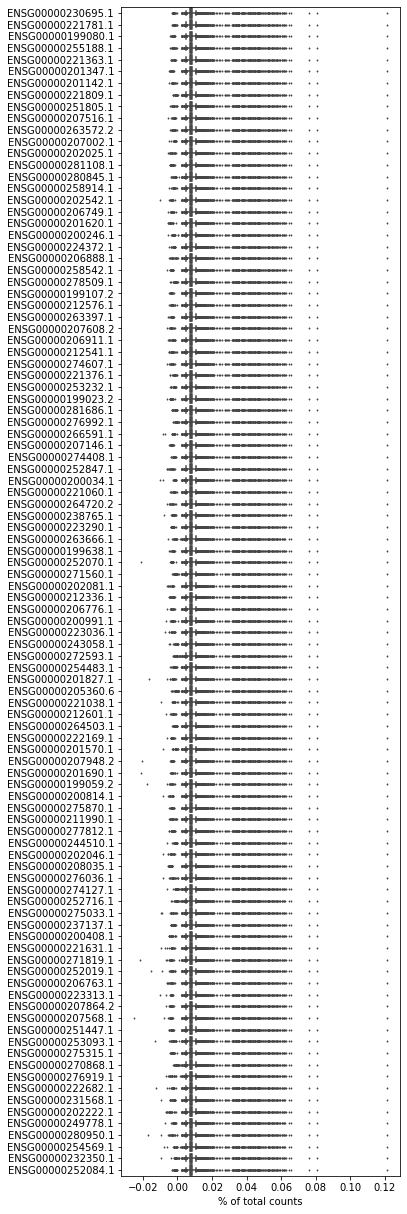

In [19]:
sc.pl.highest_expr_genes(adata, n_top=100)

In [33]:
sc.pp.highly_variable_genes(adata)

/scratch/hs3470/conda-envs/emg_env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


In [34]:
adata.var['highly_variable'].value_counts()

False    38176
True      2881
Name: highly_variable, dtype: int64

In [37]:
valid_ids = adata.var.loc[adata.var['highly_variable']==True]

In [40]:
valid_ids.index

Index(['ENSG00000276644.4', 'ENSG00000185105.4', 'ENSG00000102174.8',
       'ENSG00000166391.14', 'ENSG00000206072.12', 'ENSG00000229637.3',
       'ENSG00000166634.6', 'ENSG00000197421.9', 'ENSG00000189099.11',
       'ENSG00000135903.18',
       ...
       'ENSG00000269028.3', 'ENSG00000221303.1', 'ENSG00000109193.10',
       'ENSG00000228971.2', 'ENSG00000215644.9', 'ENSG00000048545.13',
       'ENSG00000173013.5', 'ENSG00000162825.16', 'ENSG00000186075.12',
       'ENSG00000186115.12'],
      dtype='object', length=2881)

In [41]:
sample_map

,sample,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
0,TCGA-V4-A9EE-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
1,TCGA-VD-AA8N-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
2,TCGA-V4-A9EI-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
3,TCGA-VD-AA8O-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
4,TCGA-WC-A888-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
...,...,...,...,...,...,...,...
19126,TARGET-20-PANPKN-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET
19127,TARGET-20-PANLIR-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET
19128,TARGET-20-PAPAWN-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET
19129,TARGET-20-PANPTM-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET


In [43]:
validated_data = half_processed_data[valid_ids.index]

In [44]:
validated_data

,ENSG00000276644.4,ENSG00000185105.4,ENSG00000102174.8,ENSG00000166391.14,ENSG00000206072.12,ENSG00000229637.3,ENSG00000166634.6,ENSG00000197421.9,ENSG00000189099.11,ENSG00000135903.18,...,ENSG00000269028.3,ENSG00000221303.1,ENSG00000109193.10,ENSG00000228971.2,ENSG00000215644.9,ENSG00000048545.13,ENSG00000173013.5,ENSG00000162825.16,ENSG00000186075.12,ENSG00000186115.12
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
GTEX-S4Q7-0003-SM-3NM8M,-9.9658,-1.1811,-2.8262,-3.8160,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,1.7912,...,-1.8836,-9.9658,-6.5064,-9.9658,1.2271,-5.0116,-2.3884,-0.6643,0.7407,-1.7809
TCGA-19-1787-01,-2.4659,-3.8160,1.7229,-5.5735,-9.9658,2.0360,-9.9658,-9.9658,-9.9658,-2.7274,...,-2.9324,-9.9658,-9.9658,-5.0116,-4.6082,-3.8160,1.8918,-0.3940,-9.9658,-1.3921
TCGA-S9-A7J2-01,0.4761,-2.5479,-3.3076,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-2.5479,-9.9658,...,1.6093,-9.9658,-9.9658,-5.0116,-2.3147,-4.6082,0.4125,0.0990,-9.9658,-5.0116
GTEX-QV31-1626-SM-2S1QC,-1.6394,-9.9658,-3.8160,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-0.2328,...,-2.8262,-9.9658,-2.6349,-9.9658,-9.9658,-9.9658,-1.7809,-1.1172,-9.9658,-9.9658
TCGA-G3-A3CH-11,-1.3183,-9.9658,-5.5735,5.5759,-9.9658,-9.9658,-9.9658,-2.1140,-9.9658,-9.9658,...,0.2642,-9.9658,3.9204,-9.9658,5.0917,-9.9658,-1.7322,-2.3147,-9.9658,6.7023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-11ZTS-3326-SM-5LU9Y,1.4494,-1.9942,0.4233,-4.2934,-3.1714,-9.9658,-9.9658,-1.9942,-9.9658,-9.9658,...,-2.1779,-9.9658,-0.8599,-2.8262,-0.8599,-5.0116,1.3679,0.3115,-9.9658,-9.9658
GTEX-VJYA-0726-SM-4KL1T,-4.0350,-4.2934,-4.2934,-9.9658,3.8925,-9.9658,0.3346,-9.9658,-3.3076,-9.9658,...,-9.9658,-9.9658,0.3573,-9.9658,-4.6082,-9.9658,0.5568,-0.5973,-9.9658,-2.8262
GTEX-ZA64-2126-SM-5Q5A8,-0.6193,-4.2934,-3.3076,-4.6082,-9.9658,-9.9658,-3.8160,-4.0350,-9.9658,-6.5064,...,-3.6259,-9.9658,-4.2934,-9.9658,3.4713,-9.9658,-0.0725,-0.9686,-9.9658,-4.2934


In [48]:
sample_map['_sample_type'].unique()

array(['Primary Tumor', 'Solid Tissue Normal', 'Recurrent Tumor',
       'Metastatic', 'Additional - New Primary', 'Additional Metastatic',
       'Primary Blood Derived Cancer - Peripheral Blood',
       'Control Analyte', 'Cell Line', 'Normal Tissue',
       'Recurrent Solid Tumor', 'Primary Solid Tumor',
       'Recurrent Blood Derived Cancer - Bone Marrow',
       'Primary Blood Derived Cancer - Bone Marrow',
       'Post treatment Blood Cancer - Bone Marrow',
       'Post treatment Blood Cancer - Blood',
       'Recurrent Blood Derived Cancer - Peripheral Blood'], dtype=object)

In [67]:
sample_map.loc[sample_map['_sample_type']=='Normal Tissue']

,sample,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
10605,GTEX-S341-1326-SM-4AD72,Cervix - Endocervix,Cervix - Endocervix,Cervix Uteri,Normal Tissue,Female,GTEX
10606,GTEX-T6MO-1426-SM-4DM73,Cervix - Endocervix,Cervix - Endocervix,Cervix Uteri,Normal Tissue,Female,GTEX
10607,GTEX-S32W-1626-SM-4AD6G,Cervix - Endocervix,Cervix - Endocervix,Cervix Uteri,Normal Tissue,Female,GTEX
10608,GTEX-TSE9-2726-SM-4DXSQ,Cervix - Endocervix,Cervix - Endocervix,Cervix Uteri,Normal Tissue,Female,GTEX
10609,GTEX-S4UY-1426-SM-4AD6Y,Cervix - Ectocervix,Cervix - Ectocervix,Cervix Uteri,Normal Tissue,Female,GTEX
...,...,...,...,...,...,...,...
18392,GTEX-POMQ-2326-SM-2S1O8,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose Tissue,Normal Tissue,Female,GTEX
18393,GTEX-QVJO-0226-SM-2S1R2,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose Tissue,Normal Tissue,Female,GTEX
18394,GTEX-P4PP-0226-SM-2S1NN,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose Tissue,Normal Tissue,Female,GTEX
18395,GTEX-NL3G-0226-SM-4RGLU,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose Tissue,Normal Tissue,Female,GTEX


In [75]:
selected_sample_types = ['Primary Tumor', 'Solid Tissue Normal', 'Recurrent Tumor',
       'Metastatic', 'Additional Metastatic',
       'Primary Blood Derived Cancer - Peripheral Blood', 'Normal Tissue',
       'Recurrent Solid Tumor', 'Primary Solid Tumor',
       'Recurrent Blood Derived Cancer - Bone Marrow',
       'Primary Blood Derived Cancer - Bone Marrow',
       'Recurrent Blood Derived Cancer - Peripheral Blood'] 

selected_sample_types_dict = {
'Primary Tumor':1, 
    'Solid Tissue Normal':0, 'Recurrent Tumor':1,
       'Metastatic':1, 'Additional Metastatic':1,
       'Primary Blood Derived Cancer - Peripheral Blood':1, 'Normal Tissue':0,
       'Recurrent Solid Tumor':1, 'Primary Solid Tumor':1,
       'Recurrent Blood Derived Cancer - Bone Marrow':1,
       'Primary Blood Derived Cancer - Bone Marrow':1,
       'Recurrent Blood Derived Cancer - Peripheral Blood':1
}

In [58]:
selected_sample_map = sample_map.loc[sample_map['_sample_type'].isin(selected_sample_types)]

In [69]:
selected_sample_map['_primary_site'].unique()

array(['Eye', 'Endometrium', 'Uterus', 'Thyroid Gland', 'Thymus',
       'Testis', 'Stomach', 'Skin', 'Soft tissue,Bone', 'Rectum',
       'Prostate', 'Paraganglia', 'Pancreas', 'Ovary',
       'Lining of body cavities', 'Lung', 'Liver', 'Kidney',
       'Head and Neck region', 'Brain', 'Esophagus', 'Lymphatic tissue',
       'Colon', 'Bile duct', 'Cervix', 'Breast', 'Bladder',
       'Adrenal gland', 'White blood cell', 'Cervix Uteri',
       'Fallopian Tube', 'Blood Vessel', 'Blood', 'Pituitary', 'Heart',
       'Nerve', nan, 'Small Intestine', 'Spleen', 'Thyroid',
       'Adrenal Gland', 'Salivary Gland', 'Vagina', 'Adipose Tissue',
       'Muscle', 'Sympathetic╩Nervous System'], dtype=object)

In [66]:
list(range(20))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [74]:
site_dict = dict(zip(selected_sample_map['_primary_site'].unique(),list(range(len(selected_sample_map['_primary_site'].unique())))))

In [76]:
selected_sample_types_dict

{'Primary Tumor': 1,
 'Solid Tissue Normal': 0,
 'Recurrent Tumor': 1,
 'Metastatic': 1,
 'Additional Metastatic': 1,
 'Primary Blood Derived Cancer - Peripheral Blood': 1,
 'Normal Tissue': 0,
 'Recurrent Solid Tumor': 1,
 'Primary Solid Tumor': 1,
 'Recurrent Blood Derived Cancer - Bone Marrow': 1,
 'Primary Blood Derived Cancer - Bone Marrow': 1,
 'Recurrent Blood Derived Cancer - Peripheral Blood': 1}

In [82]:
selected_sample_map = selected_sample_map.replace({'_primary_site':site_dict})

In [84]:
selected_sample_map = selected_sample_map.replace({'_sample_type':selected_sample_types_dict})

In [85]:
selected_sample_map

,sample,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
0,TCGA-V4-A9EE-01,Uveal Melanoma,Uveal Melanoma,0,1,Male,TCGA
1,TCGA-VD-AA8N-01,Uveal Melanoma,Uveal Melanoma,0,1,Male,TCGA
2,TCGA-V4-A9EI-01,Uveal Melanoma,Uveal Melanoma,0,1,Male,TCGA
3,TCGA-VD-AA8O-01,Uveal Melanoma,Uveal Melanoma,0,1,Male,TCGA
4,TCGA-WC-A888-01,Uveal Melanoma,Uveal Melanoma,0,1,Male,TCGA
...,...,...,...,...,...,...,...
19126,TARGET-20-PANPKN-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,28,1,Male,TARGET
19127,TARGET-20-PANLIR-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,28,1,Male,TARGET
19128,TARGET-20-PAPAWN-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,28,1,Male,TARGET
19129,TARGET-20-PANPTM-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,28,1,Male,TARGET


In [87]:
selected_sample_map= selected_sample_map[['sample','_primary_site','_sample_type',]]

In [88]:
selected_sample_map = selected_sample_map.set_index('sample')

In [89]:
selected_sample_map

,_primary_site,_sample_type
sample,,
TCGA-V4-A9EE-01,0,1
TCGA-VD-AA8N-01,0,1
TCGA-V4-A9EI-01,0,1
TCGA-VD-AA8O-01,0,1
TCGA-WC-A888-01,0,1
...,...,...
TARGET-20-PANPKN-09,28,1
TARGET-20-PANLIR-09,28,1
TARGET-20-PAPAWN-09,28,1


In [94]:
final_dataframe = pd.merge(validated_data,selected_sample_map,left_index=True, right_index=True)

In [95]:
final_dataframe.to_csv('tcga_data.csv')